# Importing Libraries

In [ ]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [ ]:
# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape(-1, 1)
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

# Data that you are predicting for
xPrediction = np.array([2025, 2028]).reshape(-1, 1)

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData

# Model

In [ ]:
# Look at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# Uses a search to determine the best alpha value to maximise the scoring metric
# Uses LOOCV
model = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(xData, yData)
print(model.alpha_)
print(model.score(xData, yData))

# Uses the model to perform a prediction
yPrediction = model.predict(xPrediction)
print(f'\nPredictions for {xPrediction} are {yPrediction}')

1.0
0.8810700130918124

Predictions for [[19]
 [22]] are [3942.82275711 4607.70021882]


# Plotting the Result

In [ ]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"
LINE_LABEL = "Line Label"
LOWER_X, UPPER_X = 0, 30

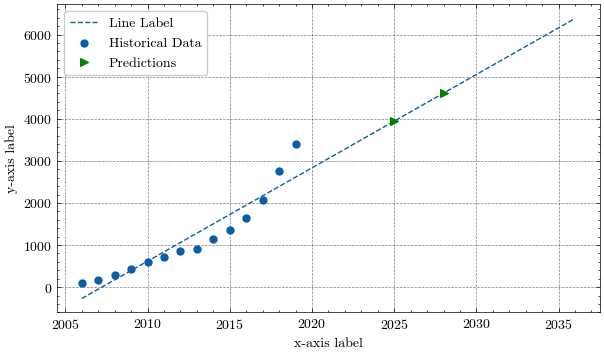

In [ ]:
# Initialises settings of the graph
plt.figure(figsize=(7,4))

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot = np.linspace(LOWER_X, UPPER_X, 100).reshape(-1, 1)
plt.plot(xPlot + minXData, model.predict(xPlot), linestyle='dashed', label=LINE_LABEL)

# Plots the data and prediction points
plt.scatter(xData + minXData, yData, marker="o", s=25, label="Historical Data")
plt.scatter(xPrediction + minXData, yPrediction,
            color='green', marker=">", s=30, zorder=2, label="Predictions")

plt.legend()
plt.show()

#Old Stuff

In [ ]:
from sklearn.metrics import mean_squared_error

model = linear_model.Ridge(alpha=.5)

model.fit(xData, yData)
print(model.score(xData, yData))
# Calculates the error
MSE = mean_squared_error(yData, model.predict(xData))
print(f'MSE: {MSE}')

# Uses the model to perform a prediction
yPrediction = model.predict(xPrediction)
print(f'\nPredictions for {xPrediction} are {yPrediction}')

0.8810826508923817
MSE: 0.5404875086999293

Predictions for [[19]
 [22]] are [3948.89802632 4615.23355263]
